# Decision Tree Assignment-2 
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
Data Description :
Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
###---EDA----
df.shape

(600, 6)

In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [6]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [7]:
len(df)

600

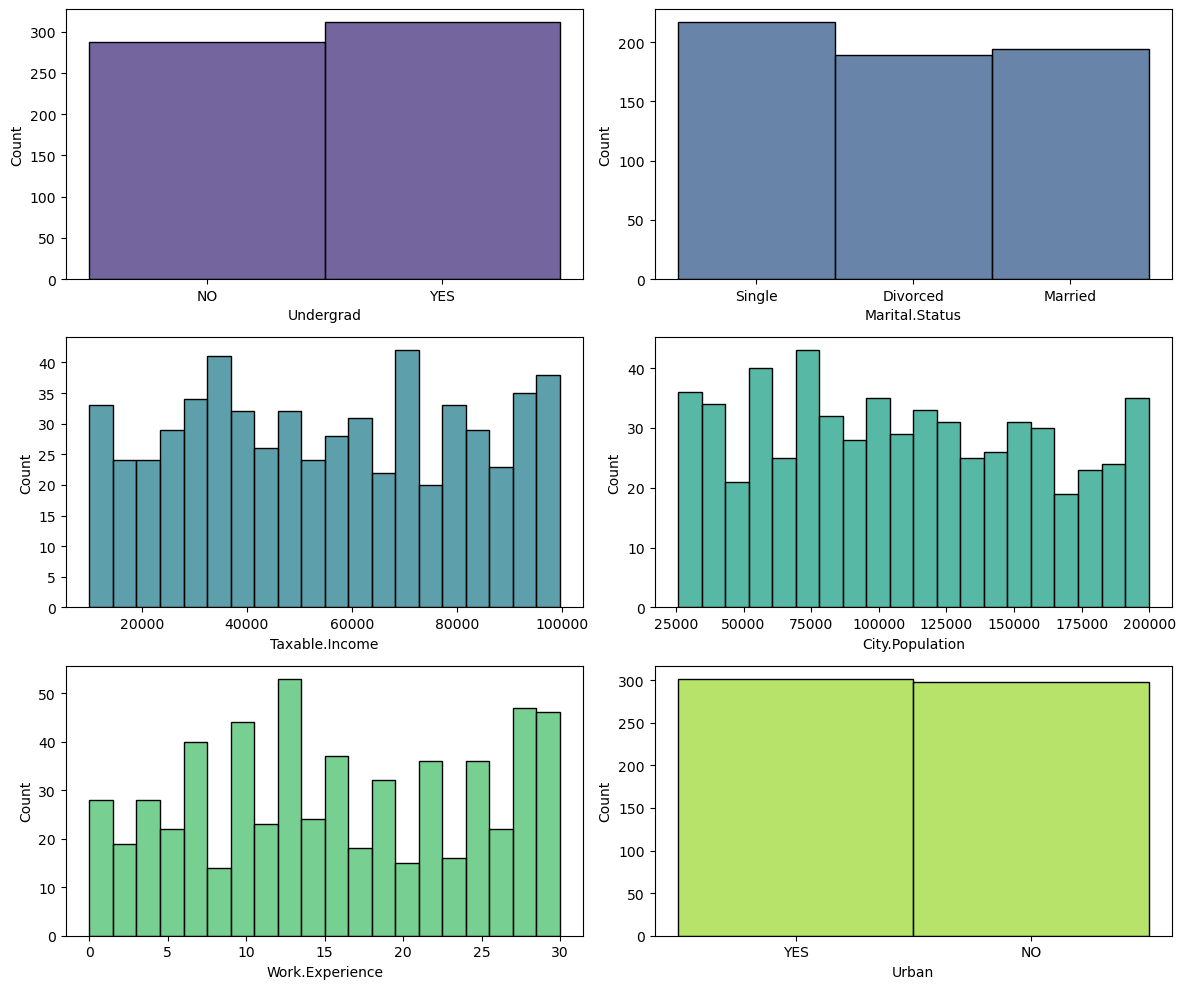

In [8]:
##--Histogram---##
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
h1 = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 2, i % 2], color=color, bins=20)
plt.tight_layout()
plt.show()

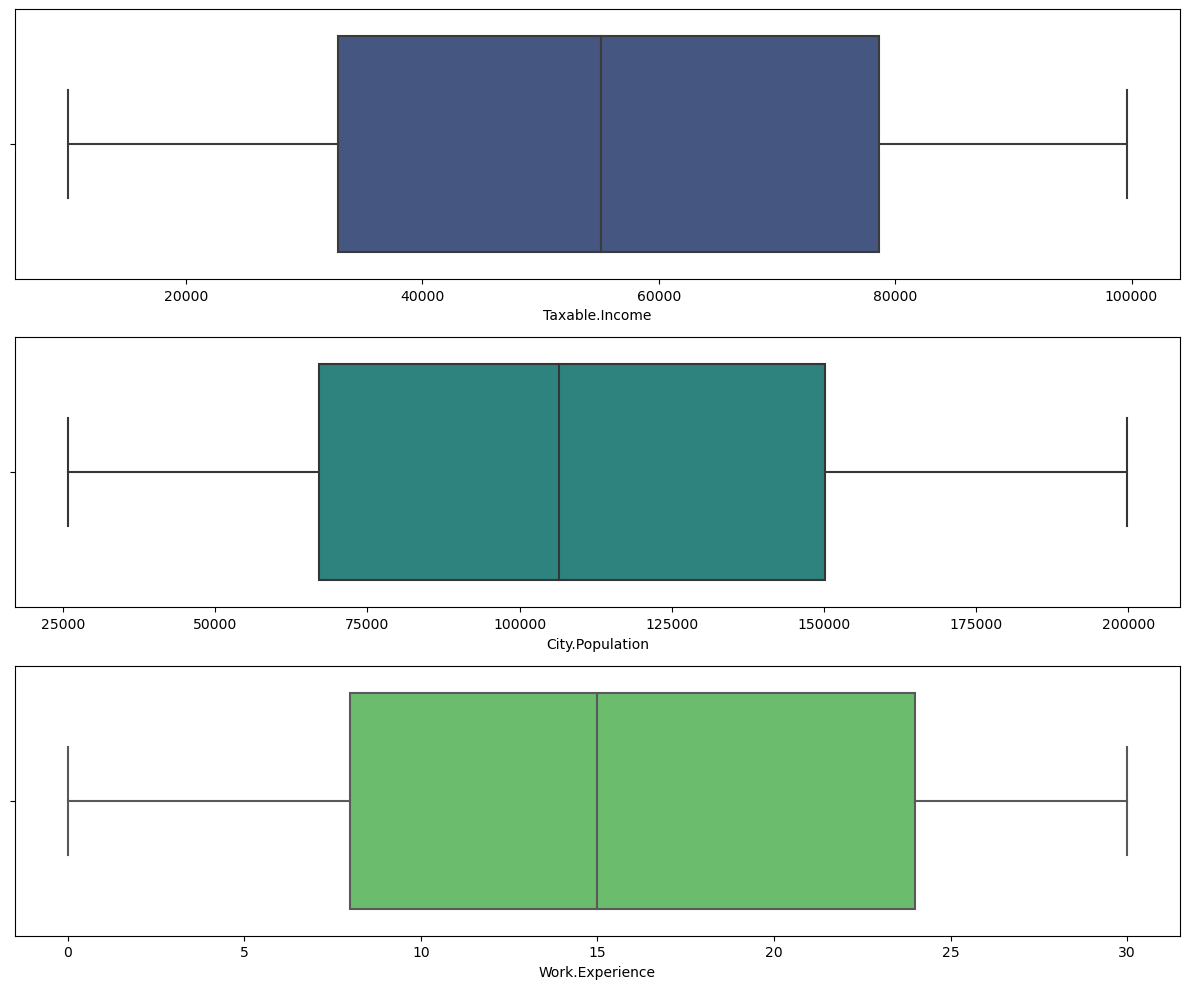

In [9]:
###---Box-plot----##
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
h1 = ['Taxable.Income', 'City.Population', 'Work.Experience']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    # Check if the variable is numeric
    if df[variable].dtype in ['int64', 'float64']:
        sns.boxplot(data=df, x=variable, ax=axes[i], color=color)
plt.tight_layout()
plt.show()

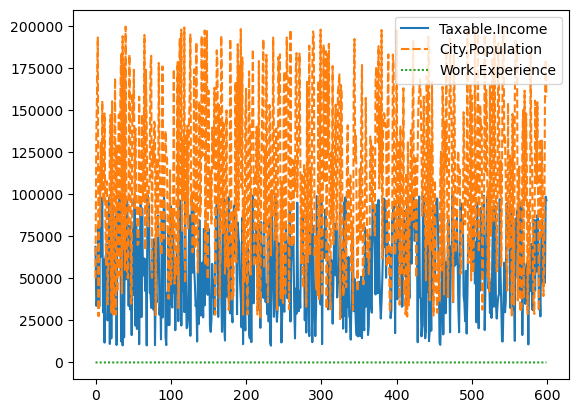

In [10]:
###---Line-plot---
sns.lineplot(data=df[h1])
plt.show()

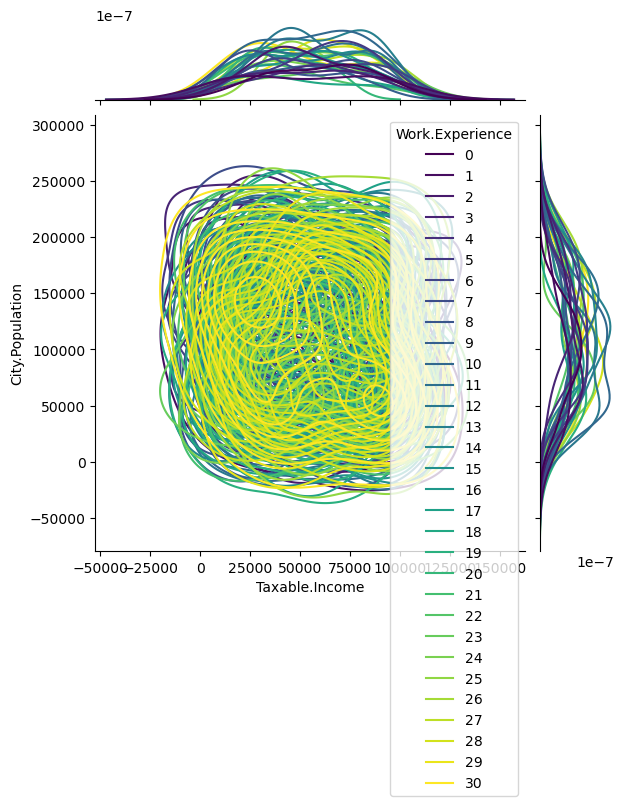

In [11]:
###--Joint-plot---
subset_df = df[h1]
sns.jointplot(x='Taxable.Income', y='City.Population', data=subset_df, kind='kde', hue='Work.Experience', palette='viridis')
plt.show()

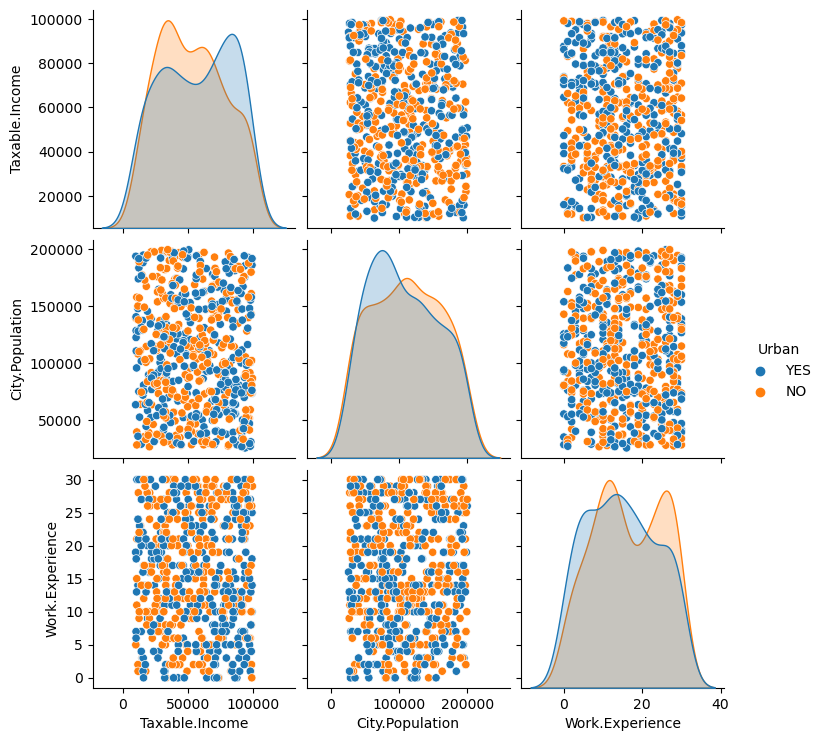

In [12]:
###----pair-plot---
sns.pairplot(df,hue='Urban')
plt.show()

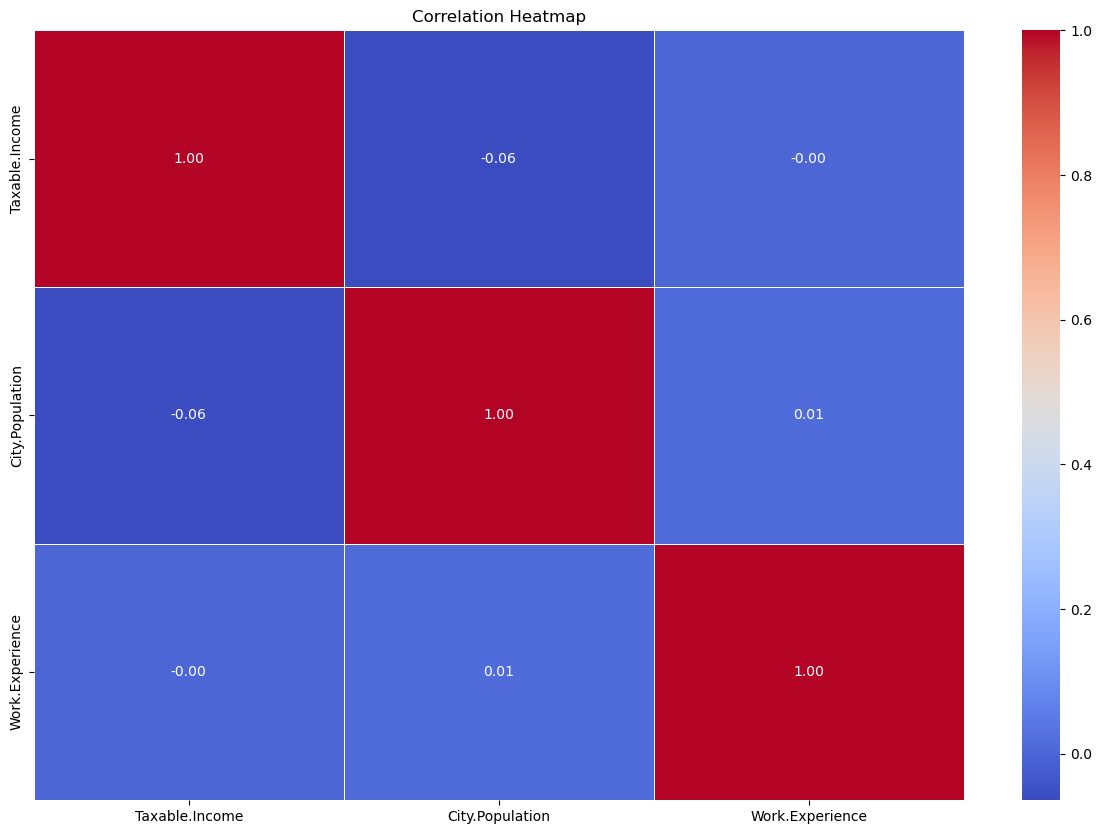

In [13]:
###--Heat-map----
subset_df = df[h1]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

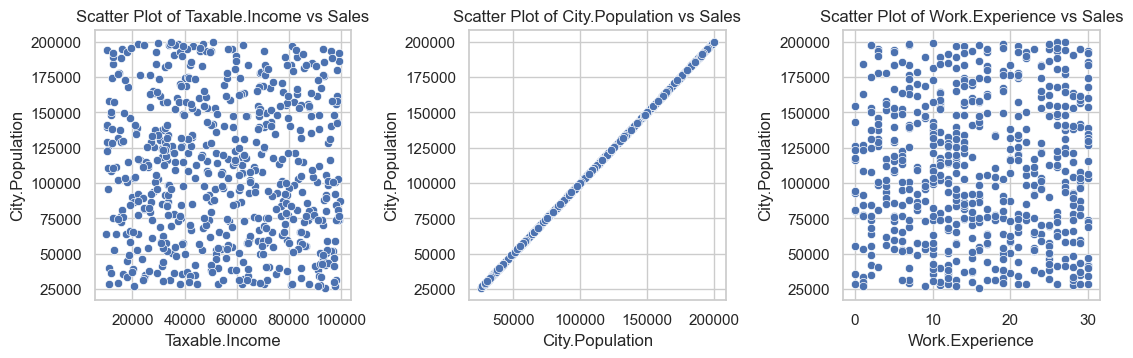

In [14]:
####---Scatter-plot--
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(h1, 1):
    plt.subplot(3, 4, i)  
    sns.scatterplot(x=df[column], y='City.Population', data=df)  
    plt.title(f'Scatter Plot of {column} vs Sales')
plt.tight_layout()
plt.show()

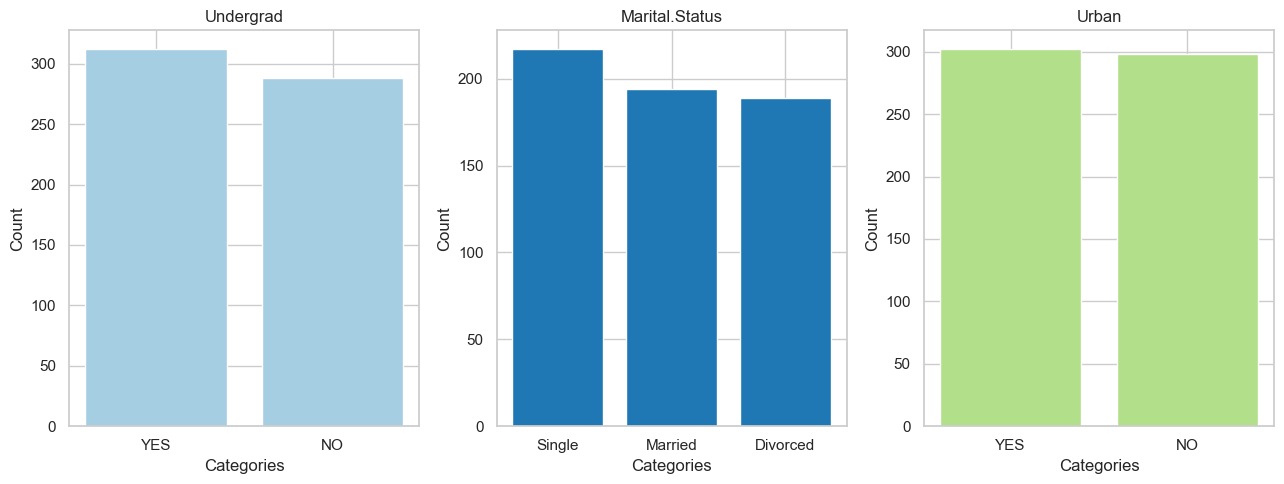

In [15]:
####----Bar-plot---
h1 = ['Undergrad', 'Marital.Status', 'Urban']
fig, axes = plt.subplots(nrows=1, ncols=len(h1), figsize=(13, 5))
colors = plt.cm.Paired(np.arange(len(h1)))
for i, variable in enumerate(h1):
    counts = df[variable].value_counts()
    axes[i].bar(counts.index, counts, color=colors[i])
    axes[i].set_title(variable)
    axes[i].set_xlabel("Categories")
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

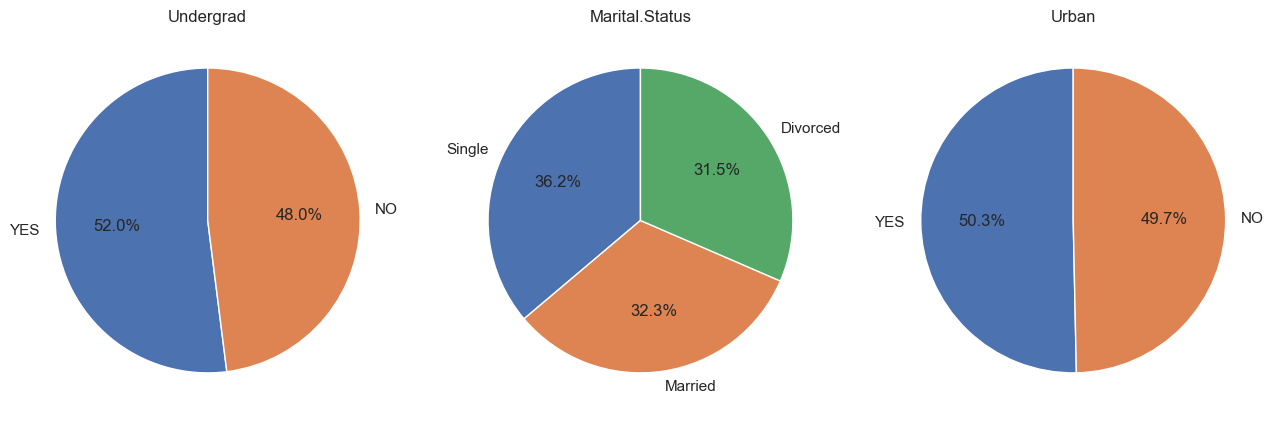

In [16]:
###---Pie-Chart--
h1 = ['Undergrad', 'Marital.Status', 'Urban']
fig, axes = plt.subplots(nrows=1, ncols=len(h1), figsize=(13, 5))
for i, variable in enumerate(h1):
    counts = df[variable].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(variable)
plt.tight_layout()
plt.show()

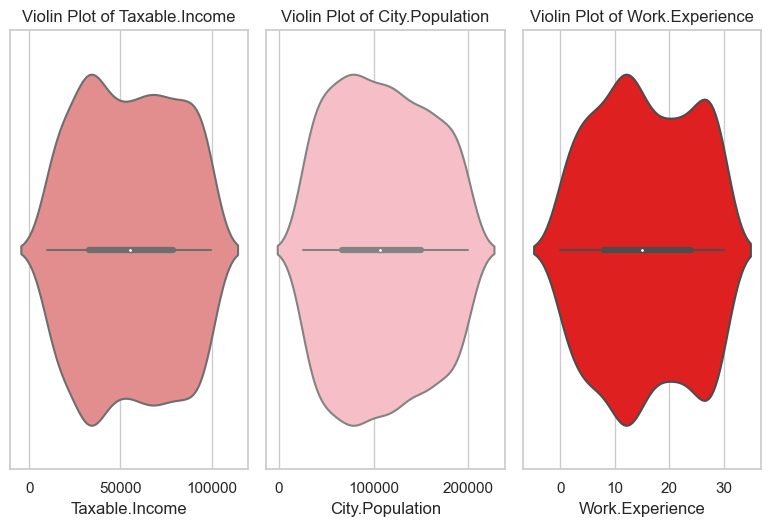

In [18]:
###---Violin-plots----
violinplots = ['Taxable.Income', 'City.Population', 'Work.Experience']
for column in violinplots:
    df[column] = pd.to_numeric(df[column], errors='coerce')
violin_colors = ['lightcoral', 'lightpink', 'red', 'burlywood', 'lightyellow', 'lightgray', 'lightcyan','orange']
plt.figure(figsize=(13,10))
for i, (violin_column, violin_color) in enumerate(zip(violinplots, violin_colors), 1):
    plt.subplot(2, 5, i)  # Start the index from 1
    sns.violinplot(x=df[violin_column], color=violin_color)
    plt.title(f'Violin Plot of {violin_column}')
plt.tight_layout()
plt.show()

In [19]:
###---Label Encoding 
Le=LabelEncoder()
df['Undergrad']=Le.fit_transform(df['Undergrad'])
df['Marital.Status']=Le.fit_transform(df['Marital.Status'])
df['Urban']=Le.fit_transform(df['Urban'])

In [32]:
###---X-&-Y--
y=df['Taxable.Income']
x=df.drop('Taxable.Income',axis=True)

In [33]:
###---Standard-Scaler
ss=StandardScaler()
ss_x=ss.fit_transform(x)

In [34]:
###---DecisionTreeClassifier---

DT = DecisionTreeClassifier(criterion='gini',max_depth=5)
training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(ss_x,y,test_size=0.30,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

In [35]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.039
Average test accuracy: 0.0


In [36]:
####---Entropy-model---###
DT = DecisionTreeClassifier(criterion='entropy', max_depth=3)

training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(ss_x,y,test_size=0.30,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

In [37]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.019
Average test accuracy: 0.0


In [38]:
###-Bagging classifier
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, max_samples=0.6, max_features=0.7)

training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(ss_x,y,test_size=0.30,random_state=i)
    bag.fit(X_train,Y_train)
    Y_pred_train = bag.predict(X_train)
    Y_pred_test  = bag.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))


In [39]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.785
Average test accuracy: 0.0


In [40]:
###---N-estimators=50
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, max_samples=0.4, max_features=0.5)

training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(ss_x,y,test_size=0.30,random_state=i)
    bag.fit(X_train,Y_train)
    Y_pred_train = bag.predict(X_train)
    Y_pred_test  = bag.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))



In [41]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.863
Average test accuracy: 0.0
